In [100]:
import konlpy

In [101]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 확인

In [102]:
dic = pd.read_csv('0431.csv',encoding = 'UTF-8-sig')
dic

,0,레옹 마틸다 빼박 나도 전남친이랑 저 케이스했었음 난 마틸다 버건디 남친은 레옹 그레이 ㅎㅎ,0.1
0,1,이제뜰려고하는데 여자가 바람필까봐 흘렸네ㅋㅋ,0
1,2,참나 이시국에 별게다 이슈화 되네,1
2,3,라디오스타에서 자기 연애한지 오래됐다고 하고 싶다 하더니,0
3,4,편애중계 나온 여자네,0
4,5,신발찍음 거의 백퍼아닌가 ㅋㅋ,0
...,...,...,...
29305,13,돈에 눈멀어서 거짓말 하지 맣,1
29306,14,영탁이 나락길 가는거냐 자제할 시기 아닌가,1
29307,15,연애 해야될 나이이긴 하지만 아직은 아니라고 하는 것이 낫지ㅋㅋㅋ 영탁이 인기가 많...,0
29308,16,사실이여도 아니고 아니여도 아니고 무조건 아니지,1


In [103]:
dic.columns = ['0','comment', 'label']
dic[:5]

,0,comment,label
0,1,이제뜰려고하는데 여자가 바람필까봐 흘렸네ㅋㅋ,0
1,2,참나 이시국에 별게다 이슈화 되네,1
2,3,라디오스타에서 자기 연애한지 오래됐다고 하고 싶다 하더니,0
3,4,편애중계 나온 여자네,0
4,5,신발찍음 거의 백퍼아닌가 ㅋㅋ,0


In [104]:
comment_data = dic[['comment','label']]
comment_data[:5]

,comment,label
0,이제뜰려고하는데 여자가 바람필까봐 흘렸네ㅋㅋ,0
1,참나 이시국에 별게다 이슈화 되네,1
2,라디오스타에서 자기 연애한지 오래됐다고 하고 싶다 하더니,0
3,편애중계 나온 여자네,0
4,신발찍음 거의 백퍼아닌가 ㅋㅋ,0


In [105]:
print(len(comment_data)) # 댓글 개수 출력

29310


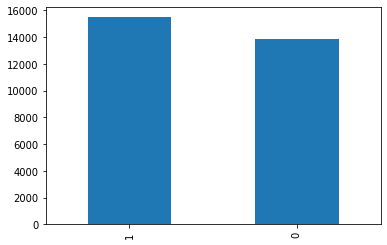

In [106]:
comment_data['label'].value_counts().plot(kind='bar') #data 분포 그래프를 통해서 확인하기

In [107]:
X_data = comment_data['comment']
y_data = comment_data['label']
print('comment 개수: {}'.format(len(X_data)))
print('rating개수: {}'.format(len(y_data)))

comment 개수: 29310
rating개수: 29310


# 불용어 제거 및 토큰화

In [108]:
normalized_text = []
for string in X_data.tolist():
    try:
        tokens = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣]+", " ", string.lower())
    except Exception as e:
        print(string)
        break
    normalized_text.append(tokens)
print(normalized_text[:5])

[' 이제뜰려고하는데 여자가 바람필까봐 흘렸네ㅋㅋ ', ' 참나 이시국에 별게다 이슈화 되네 ', ' 라디오스타에서 자기 연애한지 오래됐다고 하고 싶다 하더니 ', ' 편애중계 나온 여자네 ', ' 신발찍음 거의 백퍼아닌가 ㅋㅋ ']


In [109]:
comment_data.comment = normalized_text
for sentence in comment_data['comment']:
    print(sentence)

 이제뜰려고하는데 여자가 바람필까봐 흘렸네ㅋㅋ 
 참나 이시국에 별게다 이슈화 되네 
 라디오스타에서 자기 연애한지 오래됐다고 하고 싶다 하더니 
 편애중계 나온 여자네 
 신발찍음 거의 백퍼아닌가 ㅋㅋ 
 됐네ㅋㅋㅋ 오디션출신애들은 안돼 함량미달이야 
 ㅋㅋㅋ아니 저 영탁이란 가수가 십대 아이돌도 아니고 연애할수있지 나이도 서른후반인가 그런거같던데 그리고 뭐 연애하면 일 못하냐 다들 일하면서 연애도 하고 결혼도 하면서 
 얘는 가수가 하고싶은게 아니라 연예인이되고싶은듯 
 핸드폰케이스로는 빼박ㅋㅋ 
 누구냐 넌ㅋ 
 인기 욕구 욕구를 택한 영탁 잘가슈 
 레옹 마틸다는 빼박 
 빼박이네 뭘 아니래 ㅉㅉ 인기보단 성욕을 택했네 
 사귀는거맞네 
 빼박인데 
ㅋㅋ 돈 땡겨야하는디 방해물은 내치겠지 ㅋㅋㅋㅋㅋㅋㅋㅋㅋ 인생의 마지막 기회인디 
이랬는데 아니면 더 욕쳐먹을텐데 ㅋㅋㅋ 폰 케이스랑 여러가지 정황상 빼박이던데 언능 인정하시는게 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 
어머 닮았다 돈 들어올 때 잡아라 
설마 떳다고 차버리는건 아니것지 
맞는데 아니라고 거짓말하는거보다는 인정하는게 낫지않나 
ㅋㄱㄱㄱㄱㄱㅋㅋㄱ아니무슨아이돌도아니고 부인을ㅋㅋㅋ 
ㅋㅋ폰케이스 보니까 맞더만 여자 서운하겠다 
폰케이스에서 빼박임 
쫌 뜰라고 하니 발목이 잡히는구만 ㅋㅋㅋ 
에혀 여자 티남 이렇게까지 얼굴 알리고싶냐ㅜㅜ 
니가 왜 거기서 나와 
폰케이스 증거가 너무 찜찜한데 본인이 아니라고 했으니 나중일은 본인이 책임지겠지 
레옹 마틸다 빼박 
돈에 눈멀어서 거짓말 하지 맣 
영탁이 나락길 가는거냐 자제할 시기 아닌가 
연애 해야될 나이이긴 하지만 아직은 아니라고 하는 것이 낫지ㅋㅋㅋ 영탁이 인기가 많아지긴 했나부다 이런저런 얘기 많이 나오네 
사실이여도 아니고 아니여도 아니고 무조건 아니지 
그래 물들어올때 노저어야지 여기서 스캔들 잘못 터지면 아줌마들 돌아선다 ㅋㅋㅋㅋㅋ 
개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ
정신분열 잼 ㅋㅋㅋ
실력에비해 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


귀엽게 생겼어요
앞으로도 없을거 같은 길이길이 남을 훌륭한 사람
참 대단하네요 최고네요 
대단해요 꽃길만걸으세요
정말 잘한다 
정말 대단하고 감동이었어요
노래도 잘하고
잘봤어요 
최고라예 라는 말이 입증
행복한 시간 이었습니다
화이팅 
쵝오영원히 응원 보낼께요
이쁘고 가창력 끝내주고 최고다
대박나세요 
행복을 전파하는 밝은 에너지
고급이네 
대단합니다 대박을 기원합니다
감동이다 
화이팅 
너무 노래 잘하신다대박입니다
너무 조앗음
와 최고네요
역시ㅠㅠ 정말 최고네요
감동 감동 감동의연속 역대급 
역사에 길이길이 이름을 남기리
정말 대단하다
호랑이는 가죽을 남기고 당신은 이름을 남깁니다
넘 좋았어요 최고인것 같아요 
정말 감동이었습니다 항상 응원합니다 
잘햇어라 최고여라 
매력이 있는 국보급인듯요 앞으로 나오기힘들듯해요 
감동입니다 항상 응원합니다 
감동 감동 감동 재방송 부탁드려요 
트롯뿐만 아니라 국악도 들을 수 있어 너무 좋았습니다 비주류인 국악이 송가인님을 계기로 대중화 되었으면 합니다 
정말 감동이다 화이팅 
잘봤어요
진짜 끝내준다 멋지다 
지금 이순간 세상에 어느 누구보다 행복해 보입니다 덕분에 나도 기분이 좋네요 계속해서 팬들과 공감하고 소통하길 바랍니다 
정말 잘하네요 심금을 울리네요 인기좀 끌겠네요
쵝오여라 언제나 변함없이 응원합니다 사랑합니다 항상건강잘챙기세요
와우 감동입니다
빼어난 사람인 것 같아요
넘넘 좋아요
아무리 객관적으로 판단할 수가 없다 너무 너무 좋은 사람인것같아요 
꽃보다 향기롭고 화사한 예쁜 모습으로 큰감동을 마구마구 쏟아내어 내 가슴을 크게 요동치게 한다 
행복합니다
멋지다
너무 좋아요 멋져요
최고중의최고
오래오래 보고 싶은 연예인인 것 같아요 너무 좋네요
운명이어라 필연이어라 
너무 좋았어요
시간 가는 줄 몰랐다 감동의 도가니였다
최고중 최고네요
이시대 최고
대단하다는 말뿐 최고
진짜 노래 너무 잘해요
흠잡을때없는 얼굴 오목조목 귀엽고 너무너무 사랑스럽습니다 노래도 정말 잘합니다
잘해드 너무너무 잘해여 
행복합니다
최고였어라 

엄마도 이상해 
느그 엄마가 너 낳고 미역국 먹을 생각했다니 끔찍하다야
역시 엄마도 제정신이 아닌거야
야 정신병자야
계속 나오는거보면 스폰이 있는거같은데 
정신병자들은 제발 정신병원에 입원시키자 
저 관종 진짜 별거다하네
 희대의 관종
아 내가 쟤처럼 돈많고 예쁘게 태어났으면 진짜 걱정없이 착하고 바르게 공부든 자기관리든 뭐든 열심히 하면서 살았겠다 ㅜㅜ 참 뭐가부족하다고 저렇게 병신처럼 사냐
일반인 취급도 아깝다 저 둘 다 병신아님 
얘네들 지금 뭐하는거임 진짜 우껴서 코나옴 제정신들 차리고삽시다
참 희안한 애들이다 둘다 재정신은 아닌거 맞죠 
얘네는 좀 많이 아픈애들같다 정신적으로 진심으로 치료 받았으면 안타까워보여서 그런다
엄마도 이상한듯 
정신적으로 이상한 년 계속 나오네
그냥 더럽다 ㅉㅉㅉ
창녀 아니냐 
돌아이인대 니내들이 필요한건 그냥 치 료 ㅇㅋ 
이딴 쓰레기들 소식 좀 기사화 하지말자
더럽
그 딸에 그 엄마네 딱 답 나온다 
하다하다 왠 듣보잡이 나와서 
더럽고 추악하다
왜 사냐 사는 이유가 없을거같은데
너도 그냥 자살해 자살 어때 
점점 정신이 이상해지는것 같다니 ㅋㅋㅋ현웃터졌네ㅋㅋㅋㅋ 원래부터 정신이 좀 이상했잖아 ㅋㅋㅋㅋ
한심ㅡㅡㅉㅉ 우리나라 왜이러니
꼴갑을 떤다 ㅎㅎ 신종 관종이냐 
정신과 약처방받아 먹어라 나을수있는 병이다
조용히 지내라 꼴보기 싫다
인생 참 요란하게도 산다ㅉㅉ 
얘네는 그냥 기사화해주지 마요 진심 정신상태 이상
마약해서 맛이간듯
ㅈㄹ도 풍년이네
애미가 또라이여서 저런애가 나왔구나 
ㅋㅋ 나는 저 서희 맘이 제일 웃겨 어머니 현실을 직시하세요 영화속 주인공 다정한어머니 코스프레 할 때가 아니에요 똥을 보고 괜잖아 괜잖아 된장이다 냄새안난다 이러면 똥이 된장 됩니까 
드럽노 레즈충
엄마가 하루가 멀다하고 이상한 기사로 딸이름이 오르내리면 얼마나 가슴이 아프실까 이쁘게 키워주신 부모님 생각해서 똑바로 살자 
동성커플에 이해 안되는 폭력까지 역겹다 
원래 댓글 잘 안쓰는데 별걸다 기사쓰네요 관종위한 ㄱ사 그냥 별로임
아이들 정

천사 아닐리없죠
세계적인 독보적이 아티스트
사랑해 
널 알게된게 내겐 너무 행운이야 
매순간 덕통 사고 라구요
인성까지 완벽
겸손하면서도 늘 진심으로 사람들을 대하는게 보인다 
재능에 인성에 비주얼까지 완벽 
자랑스러워
더 많은 사람들에게 사랑만 받아
늘 배우며 삽니다 
인성은 정말 국보급인듯
팬심을 넘어 존경심까지 드는 부분이 이런 거ㅠㅠ 미담만 존재한다는 과거 
외유내강의 전형
내가 아는 한 너는 천사가 맞다
성숙한 마인드 눈길이 가용
세계적인 가수
마음 씀씀이가 완전 천사야 
뭐이리 바른 청년이 다있누
언제나 진심으로 다가와줘서 너무 고마워 
가슴이 따뜻한 사람
감동 그자체
많이 사랑하고 응원한다 공감왕
삶 자체도 우리에게 너무 많은 힐링이 되는 존재입니다 
팬들의 자랑 자부심 안식처 
무지개빛 매력 볼수록 호감호감 
다정함이 최고의 무기인듯
판타지적 실력소유자 
보고있음 현실성 제로 진짜 어찌 저렇게 현실같지 않는 사람이 있나 생각들게함
그릇이 너무 크다
뭘해도 될꺼 같은 사람 
정말 열정과 노력의 끝판왕
베스트 오브 베스트 
보기만해도 행복해지는 마법
귀염움이 한도초과
언제나 파이팅
주변을 정말 아끼는게 눈에 보인다
모든이의 귀감이 되면 좋겟네요
정말 너무 영향력이 선한 사람
토탈패키지 진짜 모자름 없이 모두가 출중한 사람인듯
잘모르지만 많이 성장하고 있는 것 같아 고마워 
너무 좋아보이는 사람
나도 이 사람처럼 되고싶다
내가 만일 애를 갖게 된다며 너처럼 키우고 싶어
부모님은 얼마나 행복하실까 
너희 부모님이 너무 부럽다
부러운 사람 항상 부러워요 뭐든 잘하네
애인으로 두고 싶은 
너만 보여
말도 정말 성숙하게 배려있게 너무잘하네 이러니 안좋아할수가 있어 평생 응원할게
웃는모습보면 얼마나 진솔한 사람인가 알게됩니다 진짜 너무너무 소중해요
요정같아요 
섹시큐티러블리 응원합니다
언제나 진심 너무 고마워 
많은 연예인들 좋아했었지만 이런 사람 처음 
너무 착하고 사랑스럽고 주변에 대한 배려심 크고 인내심도 강하고 세상 다정함 
지켜본지 이제 년 되었는데 

원래 한결같이 이상한 애였는데 사랑꾼 예술가 이미지메이킹하길래 왠걸 했더니 역시나 사람은 안변해
아프다고 봐주기에는 너무 갔다 용서해수 있는 범위를 한참 넘어섰다
그냥 말 그대로 돌아이같음 제정신으로 사는 애가 아닌것같음 뇌구조가 궁금하다 
얘 무서워ㅠ 미저리 영화보는것 같애 왜저러냐 진짜 
네이버 들어 오기싫다 이 정신병자 때문에
성인 아닌가요 전문가는 우울증만 진단한거냐 저게 우울증이냐 나도 우울증 진단 받았는데 쟤가 하는 행동이 이해가 안 가는데 강박도 있는 거 아냐 너무 이상하다 쟤 혼자 두지 마라 휴대폰도 뺏고 
진심 정신과치료를 권하고 싶습니다 이쁜사람이었는데 어쩌다 이리 되었는지 안쓰럽네요
정신병자
눈빛이 뭔가 괴기스러움
정신과 상담이 심히 필요한 시점이다 
이 분은 원래 이랬는데 결혼 전엔 이정도로 화제가 되지 않았을 뿐 
병원좀가보셔요 다니시는곳있으시다면서요 왜이러세요 진짜 
무섭다 진짜 안전이별해라 개싸이코다
조울증이니 ㅠㅠ 누가 쟤 좀 말려라 인터넷도 끊게하고 상담도 받게하고 주변에 그런거 케어 해줄 사람 아무도 없냐
정신과 치료 좀 받아야 할듯
얘도 마약검사좀 저게정상으로보이나
고소당할까봐 더이상 안재현 얘기는 못하겠고 관심은 받고싶고 발악을 하는게 눈에 보이네
진심 개 쌉 관종 진짜 하나도 안불쌍
아니 무슨 정신병이 이따위로 걸릴 수가 있나 
왜 정상이 아닌것처럼 보이지 
반려동물들까지 걱정됨 진짜 사림 숨막히게 하는 스타일인 듯 제 자도 피곤한데 당사자는 어후
좀 무서운거같아 정신세계가
정신이 온전한 애는 아닌거 같다 ㅡㅡ
이젠 무서울 정도다 병원 상담 해보길 추천한다 
나같아도 이혼하겠다 저 미저리 봐라 
얘 좀 무섭게 느껴진다 대체 왜 이러지 
성장과정에 문제가 있었던게 분명하다 
정신이상자 같다 병원치료가 시급한거같네 
기사를 자꾸 올려주니 관종짓이 재미있나 봄
부정적이고 극단적이야 인간이 음흉스럽다 뭔생각으로 행동하는지 도무지 알수없음 자기자신에 취해서 바닥까지 끌어내리네 그만 좀 해라 안그래도 안좋은 이미지 더 나뻐진다
제대로

안예뻐요 ㅋ 걍주목받고싶은듯
비호감이다
더러워보이는것도 개개인의 시각아니냐 안 이쁘네
요즘 못생긴것들이 설치면 컬크러시라 하던디 ㅋㅋㅋ가지가지한다 관종도 아니고
너는 치명적인 아이가 아니란다 작작해라 
멋있어 보여야 하는데 그렇지 않아서 문제네요 
늙은 오이처럼 생김 데뷔한게 신기하다
추하다 이쁘지않다 
시골냔이
꼴깝
얜 갈수록 왜이러는거야 구린데
못생기면 걸크러쉬 
이 못난이
참 얘도 관종이네 
얘는얼굴도못생겨 옷도개그지같이입어ㅋㅋㅋㅋㅋ왜이러냐ㅋㅋㅋㅋㅋㅋㅋㅋ
뭘입어도 안이뻐
여성성을 유난히 강조하는 룩을 좋아하본데 그게 늘 싼티나고 더티해 보인다는 것이 문제
화사 극혐 줘도안가짐
입는건 자유지만 예쁘지도 멋있지고 않아 걸크라구 그냥 관종
솔직히 우리나라에서 이건 좀 아니지 않나 시대가 변햇다고 해도 얘는 보면 무대에서나 지금도 보면 이런걸 즐기는것 같더라 
근데 멋있어보이지도 이뻐보이지도 않음
너무 못생김
미친짓이다 아예 빤츠벗고 다니지 뭐하러 입냐 지나친 오버는 안하는니 못하다
적당히 좀 해라 지나치면 구설수에 오른다 
ㅋㅋㅋㅋ저게 멋스러움 관종짓 안간힘쓰는거 같은데
솔직히 관종같음 찍히고 말나올거 알면서 일부러 저러는거
얘 요새 심하게 오바하네 딱히 멋스럽지도 않은데 적당히 해라 화사야 괜히 비호된다
너무 인위적으로 이슈만드는거같아서 갈수록비호감으로 
멋있지도 예쁘지도 스타일리쉬 하지도 않음 그냥 관심 필요해요 하는거 같음 얘네 노래 창법도 시름
안본 눈 삽니다 ㅋ
관종
얘는 하는짓마다 꼴불견 관심받고 싶어 안달났어 저러고 다니기도 힘들겠어 왜 저러는걸까 
화사가 싫타 난 
난 궁금한게 본인을 못알아봐주길바라면서 얼굴가리고 과하게 입는건지 저리해서라도 알아봐주길 바라면서 얼굴을 가리고 저런옷을 입는건지 항상 궁금함ㅋㅋ
이거 년대에 유행하던건데 역시 돌고도는구나 
관종 못생긴 관종 저게 정상적인 생각을 지닌 사람 옷인가 음란의 영이 가득한 관종
저러고 돌아다니면서 마스크쓰고 모자는 푹 눌러썼데 컨셉이 뭐람
주책이야
미친거지 저게 패션이면 옷을 왜 입어
이거

싸구려
이년도 미쳐가네
자중 좀 하지 아나운서에 대한 막연한 신로감도 깨지려 한다 
얘는 또 왜이래 아나운서 품위따위는 이제 없군 운동 한답시고 뽑내시고 싶은가 보군
느러진 옷 착용 한 다방 할망구 같다 
천박해보임
에구 관종 하나 추가
농염한게 미치긋다 
그 무엇을 해도 촌스러움
예쁘단 생각보단 인상부터 쓰게되네요ㅡ이유는 당신이 생각해보시길 
나이값이라는게있단다
남편은 밤이 무서울거 같아
도대체 이사진을 찍은사람도 이상하네요 좋아보이지않아요 몸뿐아니라 태도도 가꾸셔요 
너무비호감
아나운서라는 직업이 아깝다
아줌마 왜이러지 남편은 있는거 맞아 고마해라고
생각없어 보여요 
하룻밤에 만원 하더라 ㅉㅉ
몸매가 예쁘시긴한데 왜 저러는지는 모르겠음 
아나운서씩이나 했던여자가 저렴하게 왜이럴까 남편사랑을 못받는듯 
대박이당 불끈불끈하네ㅜㅜ 제발 오크녀들 부들부들 하지마라ㅋ
몸파는애같음 그리 보이는걸 우째 이런 자극적 기사는 좀 자제해줘요 
노래방 도우미 스타일
차라리 대놓고 이쁜척을하세요
주책이다 주책이야 
아줌마 추하다 도랐나
아줌마 그만요
남편한테만 보여주기 그렇게 아까웠니
이휴 불쌍하다 애엄마가 맨날 저러고있으니ㅜㅜ관심이 필요한가봐 
한창 자라는 동생 옷을 뺏어 입은 장애인 처럼 뭐야 그게 몸이 장애 있냐 
된장녀처럼 보인다 어쩔 ㅜㅜ
아고 지랄
아나운서 쯧쯧 
더러워 나이처먹고 추하다
얼굴은 나이들어 뵌다 
으이그 주책아 낼모레 쉰이다
없어보인다 
이 분은 왜 자꾸 이런 식으로 어필하는지요
관종
나이가 들어보이네
아나운서들은 병이 다 있어
몸매도 좋고 옷이야 자유니 짧든 길든 노출이 있든 없든 다 관계없는데 코디가 좀 촌스러워요 귀걸이 특히 
이사람은 너무 가식같아
나이값은 해야쥐
간장냄새 날거같아요
왜 이러니
어우야 아지매대단하네 
그동안의 이미지가 아깝다 안달란 사람 같아 보이네 
왜저래 ㅋ하루종일 메인에떠도 안보다가뭐냐하고 들어왔더니안본눈삽니다
뭐하는거임 
관심종자 명추가
싼티
할미 여기서 이러심 곤란 ㅋㅋㅋ
관종ㅡㅡ역겨워
아줌마 관리잘했네 
얘 왜이래 대도

송혜교 기사 그만 나오면 안되나요
이젠 니 팬 못하겠다 더 이상 쉴드칠 데가 없구나 
못된것 그렇게 안봤는데 그럼못써 
송혜교 비호감 ㅠㅜ
애는 그냥 홍콩가서 살면 될듯 짜리몽땅한게 별것도 아닌게 이미지가 거품인것같아 
너무 성을 밝혀서 징글 짜리몽땅 양귀비는 넘치는 성욕에 수간과 윤간까지도 했다지 ㅉㅉ
송혜교 진짜 싫다
싫다 그냥 보는것도 싫다
자숙이라는걸 좀 해봐라 질 할때냐 세금문제때도 개뻔뻔스럽더만
독기메이크업 하고 쿨한 척 너 따위 남자 내 인생에서 사라져도 상관없이 할 일하며 즐겁게 사는 척 기왕 이미지 ㅈ창난거 희대의 난년인 척 팜므파탈인 척 눈 치켜뜨고 요염하게 웃어주기 당당한 여우 이게 바로 나야 
송탈세 이젠 알바풀어도 이미지세탁 안돼는 그냥 개비호 탈세녀
밥맛
이젠 안보고싶다
편집장이란분이 안티네 사진보니 있던 정도 떨어진다
얜진짜개뻔뻔
그래도 이미지 별로다 헤퍼보여 매번 스캔들나고 그 스캔들로 결국 이혼이냐ㅉㅉ
솔까 저자세 저표정 친한 여자 친구들끼리도 잘 안하는데 졸 징그럽다 
텅비었네 머리
이제 저여자 사진좀 그만 올려요 국민들 스트레스 주지말고 뭔 내용은 없고 허구언날 이쁜척 사진타령이야
얼굴이와저래
어우 내눈 
화장은 진해졌는데 왜 더 초라해보일까 
무섭다
누구 보란듯이 잘사는척 행복한척 
근데 가슴 어디감 
인생만사 인과응보다 
이혼하더니 비호감 되버렸나 악플이 엄청많네
송송커플이라 할때는 둘이 같이 찍힌 사진만 봐도 고급스럽고 범접할수 없는 아우라같은게 느껴졌는데 각자 흩어져서 찍힌 사진에는 너무나 초라하게 느껴지네 송중기도 너무 좋아하는데 그냥 초라해보이는건 어쩔수없어 ㅜ
나라어려운데 이런것좀 자꾸 올리지 마라 보기싫다
안궁금 나오지않았으면요
고만좀 기사내라 언플의 여왕 
애쓴다
저런거 며느리볼까무섭다 불여시
늙은여우 
정상아닌 계집
이혼이 죄는 아니지만 요새 좀 많이 나대네 비호감
오만정 다 떨어진다 이혼이 흠은 아니나 아무일 없단듯 오버떠는것도 정상은 아니다 송혜교 너에게 정상적이란 뜻을 알기나 할까 
휴 앞길이훤한총각을 

전부터 생각했지만 울 지민이는 위인전 한권 나와야해요 존재해줘서 고맙고 사랑해
저도 이걸 읽었는데 그냥 감동이에요 길었는데도 시간가는줄 몰랐어요
저 어린나이에 꿈을 향해 매진한 지민이의 삶을 언제나 응원해주고 싶습니다
저 울어요지민님은 진짜입니다
저 지민 씨 되게 좋아하는데 
자만하지 않고 노력하는 지민 더욱더 성장해서 본인이 하고자 하는일 다 이루길 바래요 옆에서 열심히 응원하겠습니다 
자부심에 찬 우리지민이가 연예인이란 직업을 선택함이 후회없게 영원히 사랑하고 응원할겁니다
자랑스런 기사네요
자기자신에 무게를 감당하고 일만시간의 법칙을 꾸준히 지구력있게 지켜온사람은 뭘해도 됩니다 지민이가 교과서처럼 보여주고 있는 삶이죠 
자기자신을 가장 빛나게 관리할 줄 아는 너무나 멋진 사람
입덕한지 오래됐지만 지루할 틈을 안줌 매번 새로운 매력으로 빠지게 만드는 무대에서 예술하는 아이돌 지민아 많이많이 아끼고 사랑한다 
인기 절대 그냥 얻어지는것 아니죠 진짜 이렇게 큰 스타도 계속 인기 얻기 위해 노력하고 발전하는 모습 귀감이 됩니다 지민이 진짜 좋은 사람이예요
인기에 비해 왜 부족해 보일까 왜 멋있지가 않지 인기는 많다는데 좀 관심은 떨어지는건 사실
인생까지 응원하는 연예인은 처음이예요 자신의 일을 대하는 자세가 누구보다 멋진 지민 행복길만 걷자
인생을 안일하게 살아온 저로서는 천재적인 재능과 실력을 보유했는데 한결같이 치열한 지민이가 너무도 존경스러워요 정말 보석같은 내 슈스
인성자체 영혼자체가 맑고 투명한 사람 그래서 지민이가 하는 모든것들이 행복으로 전해지는듯 해피바이러스 
이런 사람이라 점점 더 사랑하게 되고 더 응원하게 되는거 같네요
이런 보석 같은 사람을 알게 된것이 나에겐 큰 행운입니다 묘한 매력을 소유한 사람 그대라면 평생 응원하며 팬으로 남을수 있을것 같아요 사랑해요 
이런 사람이 존재한 샆을 정도로 대단한 의지와 노력으로 빚어낸 지민이의 삶을 앞으로도 끝까지 응원합니다
이런 생명체가 있다는게 놀라워요 뭐하나 부족한게 없는 사람 
이런 아티스트가 또 나

목소리 하나로 무대를 지배하는 유일무이한 국보급 가수 이어라 
국민들의 마음 치료사 어느별에서 누가 보냇나
국민 힐링 최고의 가수 응원합니다 
많은가수들이있지만독보적힐링보이스참대단합니다 
항상 응원합니다 최선을 다하는 가창력 마음을 울리는 최고의 인성 
미스트롯때 가슴을 휘젖는 깊이있는 노래 한곡 딱 들어보고 아 잘한다 생각했습니다 콘서트 보러갈때 다른 부부 물어보니 똑 같다 합니다 백년도 아니고 천년에 한번 나올가 말가 한 가수니다
설레요 그냥 가수님이 항상 저희 곁에 있어서요
믿고보는가수
대세는 다른 거 없다 탄탄한 실력이 짱이다 어릴 때부터 판소리로 다진 목소리에 정규 음악대학 출신의 기본이 밑바탕을 이루고 있다 
대단한가수 신곡 대박나길 바랍니다
실력 인성을 두루두루 겸비한 가수시네요 
감성 감정 호소력 곡해석능력 자질 창법 모두가 탁월하다 
한번들으면 마약같아요 
아이돌 부럽지 않습니다 사랑합니다
진정한 트롯계의 가왕 
오늘도 노래 부르는 것 봤는데 역시 가창력이 뛰어난 가수임을 다시 느꼈다 
절절히 단전에서 올라오는 보컬에 행복에 젖어 집니다오래도록 우리국민 곁을 떠나지말고 지켜주시기 바랍니다
말로 표현할 수 없는 감성 인성 친근성까지 모두 갖춘 대세 중의 대세 
당신이 없었다면 세상이 얼마나 우울했을까 
내인생의 귀인이어라 
말하면 입아프고 글로 쓰자고 해도 끝이 없을듯시작과 하루의 마무리까지 함께 합니다너무 잘해요 
아 년에 한번 나올까 하는 사람
 년 동안 살아오면서 외면했던 트로트를 좋아하고 빠져들기는 내인새에서 처음입니다 당신이 부르는 트롯은 마력이 있습니다
사람의 마음을끄는 마력이 있다 국민의 마음에 위안과 휠링을주는 국보 가수가 되길 바란다 
누구의 노래든 상관없이 부르면 자신의 노래가 되는 쟝르 불문의 참 가수 중 가수죠 동시대에 태어나 가인의 노래를 듣고 누릴 수 있음에 감사할 따름입니다 
들을수록 빠져드는 마력이 있는 가수입니다 트로트 유치하다고 관심도 없었는데 지금은 송가인 노래만 듣게 되네요 
하루라도 가수님 노래 안 들으면 견

달마시안아줌마같네
흠 성형한 것 같네요 
더못생겨진것같아
쌍수만 해도 티가 다나서 
눈이 많이 달라져보이는데 
성형하니까 더못생겨지는것도 어려운데 쟤는 졸라 못생겨짐
무섭다ㅠㅠ
성형이 아니면 쉬면서 얼굴이 삭은건가 
그냥 못생김
성형이 아니라면 휴대폰 바꿔
전혀안이뻐 ㅎㅎ언제부턴가 원숭이상돼가더니 빵빵해졌네
누가 봐도 성형 했고만 
근데 예전에도 성형한거였는데 
누구를 바보로 아나 딱봐도 성형했는데 
누가봐도 달라진얼굴이잖아
네 성형 아니구요 그냥 못생겨지셨네요ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
성형눈
성형한거 같은데 
어우 징그러
예전 얼굴이 더 나았는데 안타깝네
누가봐도 한 얼굴인데
성형했으면 얼굴자리잡고 노출돼라 보는사람도 힘들다
쌍수는 한듯한데 그나저나 예전보다 못생겨진건 확실함 
티가 마니나게 했는데요 왜 거짓말해요 
한거같은데 ㅋㅋㅋㅋㅋㅋ
걍 무관심이 답 
너무 심하게 손댄듯
암튼 얼굴에 뭘 하긴 했지 
참 못났다
꼴갑떤다ㅉㅉ관심도없다 ㅋㅋ법적대응 ㅋㅋ
더 못생겨졌어 
튜닝했는디부인하는게웃기농 요즘시대에성형이죄도아닌디ㅎㅎ
자가 기분 잡친다고 고소 욕을 한것도 아니고 벼슬이네 벼슬
웃기고있네 ㅋㅋㅋㅋㅋㄱ
관심도 없는디 왜자꾸 나오는거야
방방뛰는거보니까 했네
그러기엔 좀 달라진거같은데
완 전 시술한 얼굴이네 
ㅋㅋㅋ 황정음 겁나 비호감이네 
졸라게 못됬다
그럼 사진을 올리지말았어야죠 얼굴이 예전과 다른건 사실이잖아요 
성형 했으면 했다고 해라 좀ㅋㅋㅋㅋㅋㅋ구질구질
대중을 바보로 아나 딱 봐도 달라졌구만 
안이뻐 관심없어 그냥 통장에 원 있다가 빵떠서 고무신 거꾸로신었다매
성형 맞는거 같은데
이 년 나오는 프로 죄다 근절이다
못생겨짐
개징그러워
사진 무섭게 나왔는데 
눈이 바뀌었어 그리고 이마는 시술햇구만
요즘 성형이 뭔 대수라고 누가봐도 상하안검 수술한거 티나는데 
그럼 그냥 못생기셨어요 
이상하니깐이상하다 말도 못함 
얘는 왜 맨날 주인공 하는건지 
해서 이쁘면 다행인데 안예쁜게 문제다 
이마 눈매 콧대 턱 필러 티나는데
진짜 까칠하네
중국풍 얼굴
앞머리좀 심으면 

존잘 
진짜 잘생겼다 ㅠㅠㅠ
너무 멋지네요 항상 응원합니다
역시 최고 미남 대박 멋져용 
연기가 항상 빛을 발하지 
미쳐따 진짜 
배우 피부 진짜 좋다 실물 대박
어떤 헤어스타일이든 다 소화를 하네 복지다 
잘생겼는데 못생겼다는것들은 얼마나 빻았길래
너무 좋아요 반의반 기대할께요
잘생쁨 
최고시다
진짜너무 잘생겼드아 남친짤 대방출 
어떤 헤어스퇄도 잘어울리는구나 저잘생긴얼굴 아끼지말고 열일해줘요 언제나 응원 
다 좋아요
볼수록 이렇게 행복해지는 사람이 또 있을까요 힐링 그 자체
조오타 
진짜 동안이다
헐 진짜 잘생겼다 멋있다 
훤하게 잘생겼다 항상 응원합니다 화이팅 
너 멋진데 귀엽다
대박 
너무 멋있다
같은 옷을 입어도 다른 분위기가 공존하는 매력 행복하다 ㅎ 인성이 바른 사람이어서 더 좋다
머리스타일에 따라 느낌이 다른군 소화잘하시는균용
예쁘다 
까약 넘 잘생기셨어요ㅠㅠ
깔끔하니 예쁘다
참 여러 느낌있어서 좋아
착하게 잘생깄네
와 완전 짱 
와 고딩이라고 해도 믿것어 
흐믓 
냉미남은 어디 보여줘 보고싶어유 귀여움만 가득한데 
첨엔 별로였는데 갈수록 잘생겨지고 연기도 잘하고 인성도 좋은것 같고 한마디로 참한것 같음
이게 나라냐 ㅜㅠㅠ존잘
저리 다양한 분위기가 가능하니 연기가 더 기대되는것도 있음
귀엽다
관심 쩌네
뭔들 
캬아아아 너무 멋있어요
항상 응원한다
너무 존잘 
멋져요 
잘자란 도련님같아요
강아지처럼 예쁜미소 탄탄한 연기력 
멋진배우 응원합니다
헤어스타일에 따라 분위기 다른거봐ㅋ 큰 장점이기도 하지
쌍둥이처럼 인 역도 잘할듯 분위기가 확다르네
인상그자체가 착해 마니 착해
우와 멋짐의정석
응원해요 
존잘 넘나좋다 
혼자서 존잘존섹존멋존커 다해먹네
냉한 분위기도 매력있어
내리는게 어려보이고 더 예뻐보인다
아 좋ㄷㅏ 근데살이너무빠진듯
사랑해요 
잘생겼다 진짜 
진짜 정석이다 정석
이건 예쁜 거 아닌가 솔직히 여장해도 겁나 예쁠 듯
진짜 학식 오빠같다 
크 여자들이 좋아하겠군
고생이 뭔지도 모르는 부잣집 막내아들같군요 그것도 복이지요 정말 큰 복입니다
활짝

찢어줄일 년
가지가지한다 미친년 먹튀 제대로 하고 갔구만 
저기 미안한데 머리부터발끝까지한개도안꼴림 
벼락맞을년
저거 완전 또라이네
행동 하나를 보면 열을 안다고 ㅡㅡ 국민들한테 사기친거네 ㅁㅊ ㄴ
왜사냐 넌 사는 인생이 쓰레기만도 못한데 넌 술집여자보다 바닥인생이야 알아
몸팔던짓여전하네 돈벌수단이그거밖에없지 참불쌍한인생이다
쓰레기네 완전 ㅎㅎㅎ
끼리끼리 유유상종이였네 저급한 시러배잡것들 
걸레 지랄하는 꼬라지가 우습네 
이상한 년 이구만 
완전 관종 고인을 왜 이리 못살게 구는 사람이 많은건지
관종 미친병
애는 원래 이런애니깐 며 그냥 웃긴년이고 잴 중요한게 이런년을 시체팔이에 이용해 선동질하는 ㄱ ㅐ잡것들을 죽여야지 
보면 수술 한 사람들이 꼭 저래 가슴골 보이면서 벗고 다니더라 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
썅 년
사람이 벌어먹던 버릇 못고친다고 ㅉㅉㅉ 수준 알만하다
헐 더러워
얘도 참 한심한 인간이더라
참 드러운년들 많네
진저한 김치년이다 ㅋㅋㅋ 개잡부
엄청 벗고 싶으셨군요
너도 꼭 죄값은 받아라 어떻게 죽은 사람을 이용 돈을 챙겨
말투 부터가 삭아지 없게 느껴지더라
진짜 욕도 아까움 ㅋㅋ 캭 퉤 기사 올리지 마라 꼴배기싫다
재수 나쁜뇬
아주 잠깐 누가 올린 저사람 영상 본 적이 있는데 아닌척 카메라 들고 우연히 카메라가 가슴에 밀착되는 것처럼 하던데 일부러 그러는거 너무 티나더라 
와 희대의 개ㅆㄴ 이네 ㅋㅋ
그냥 관종 
관종이었구나 못됐다
맛있겠다 보기좋네 자주해본솜씨야
그래 이게 딱 니수준이야원숭이상
관종이네
완전 미친년
쓰레기같은 녀 ㄴ
지랄도풍년이요 
지정신이 아닌 년이구만 ㅉ
아무리 돈이 궁해도 죽은 사람을 팔아먹냐 분리수거도 안되는 년
얼굴은 이미 상폐인데
뭐 저딴 애가 다 있냐 허언증에 이제 노출증 
저년 똥꼬에 싸커킥 갈기고싶다 나쁜년
미치으은년 너야말로 정말 오물보다 더 더러운 괴물같다 
장자연 하고 같이 술집에서 몸팔던 년 ㅎㅎㅎㅎ
감춰두기엔 넘 안타까운 꿀 계로 진출하면 전무후무 대성공할텐데 ㅉㅉ
이런 정신 나간년을 ㅉㅉ
이런년이 강간 당해야

우주대스타가 되길 진심으로 진심으로 
우리 모두의 귀감이 되시는분 최고최고입니다 닮아가고 싶네요 
요즘 내 삶에 가장 선한 영향력을 끼치고 계시는 좋은 분 
요즘 당신을 보며 느끼는 바가 많습니다 남겨진 삶에 어떤 무늬를 입힐지 매일매일 생각해요 당신의 대 시절 브라운관 모습이 선명하게 떠오르고그 자유로운 느낌에 홀릭되었던 대입니다 뭔가 계속 억누르고 살아와 늪에 빠진 것 같았는데당신의 말 한마디 한마디가 날 끄집어 내주고 있어요 너무 고마워요 당신의 색깔을 잃지 마시길 늘 행복을 빕니다 
외면보다 내면이 더 멋지고 아름다우세요 다른 사람의 아이의 인성을 만들어주셨다는 얘기에 존경심이 듭니다 
외모 내면 그리고 끼 박자가 고루 아름답게 갖쭤진 멋진 사람 부디 끝까지 꽃길만 걸으시길 
외모 심성 말 모두 아름다운 사람 
외유 내강이신거같아요 겸손하시면서 자존감도 있으시고 긍정적인 모습이 보기좋아요 롱런하시길 바래요 잘 드시고 건강 챙겨가며 일하세요 살이 빠지셨어요 응원해요 
외유내강 진짜 그의 매력에 끝없이 빠져든다 볼수록 더욱 응원하게 됩니다 사랑해요
외유내강이 딱 맞는분이더군요 본받고 싶어요 
완전 외국배우처럼 주름이 자연스러운 얼굴이 넘 멋있어요 개인적으로 화장안한 내츄럴한 모습이 더 좋아요
완전 좋아 
완젼 응원합니다 너무 멋진 사람
와 이형은 진짜 잘됬음좋겠다
이제 꽃길만 걸으세요 응원합니다 
이제 다시 데뷔하셨으니 연예인도 하고 하고 싶은 거 다 하세요 응원합니다 
이제 상처받지도 상처주지도 말고 함께 꽃길을걸어요 팬은 아니지만 인터뷰마다 말들이 참 아름답게 힘이 있어요 감사합니다 응원합니다 
이제 좀 헤어나오는가 싶었는데 방금 다시보기로 보고나니 아름다운사람 이라는 느낌을 받은게 얼마만인지 모르겠다 지켜주고싶은 제발 꽃길만 가시길 
이사람에 대해 잘 모르지만 얘기하는거에서 진심이 묻어남 그냥 좋은사람
이사람은 최고다 
이분인성참좋으신것같다방송잘봤어요
오래오래 하시고 싶으신거 다하세요 응원합니다 
오래오래 함께해여 
오래오래 활동하셨으면 좋겠습니다
오

싼티줄줄흘르네 흘러
첫번째 사진수술한 가슴 티나네 엉뽕도 어색
가슴수술 다 표 나구만
어이가없네 대체누군데 홀딱벗고 시집간다고 난린지 하나도 안이쁘구만
뭐야 이 듣보잡 관종은
가슴은 수술하고 똥배는 뽈록하고 얼굴은 못생겼네
드레스보다 수영복이 더 어울림 핏이 안 나옴 로리타좋아하는 노땅 금수저남일듯 나이차 최소 년
관종인건 확실히 알겠다
참 기괴한 생명체야
얼굴만보면 별루네 쩝
수술한듯 인스타보니 누워도 모양그대로 수술하면 저리 이뻐지는구낭 휴
엉덩이 아이면 가슴이구나 ㅋㅋ엉덩이 뽕 대박 ㅋㅋ
스폰이겟지 숨기는걸보니 니혼자 결혼햇다고 착각하냐
노출로 먹고사네 사진꼬라지봐 ㅂㄷㅂㄷ
ㅋㅋㅋㅋㅋㅋㅋ엉뽕짱
누구야 가슴하고 엉덩이는 봐줄만 하다 ㅎㅎ
웨딩사진 궁둥이 뽕 너무 넣었네
 발 그래서 얘가 누군데 몸파는년이냐 일반인인데 왜 기사에 실검 위를 찍어
누구신지 뽀르노 배우인줄 
근데 얼굴은 좀 못생김 
짐승같은새끼ㅋㅋ
먹고싶다
의젖 너무시러 ㅋㅋ 근데 면상은 ㅈㄴ매력적이게 이쁘게생겼당 ㅋ
와우 쭉쭉빵빵 미드에 애플힙 ㄷㄷㄷ 남편분 발기 안되는 날이 있을까 부럽습니다 
가슴이다했네
와 엉뎅이 별로다
ㅅㄱ부럽다
전형적인 관종
가슴 존나 크다 
싸발것ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
남편 밤마다 불끈불끈하겠노
관종 끝판왕이네
크흐 번째사진 빵디 진짜 이쁘다
김치 뚱땡이년
누구지 에로모델이냐 
모델도 모델 나름이지 무슨 포르노에 나오는 여자도아니고 
스폰해주다가 결혼했겠지ㅋㅋ남편 언급 도없다는데 쿰쿰하나부지 최지우처럼
왠 듣보잡이냐
가슴수술 부럽
누가 남편 인지 모르지만 부럽다 가슴도 풍만하고 아래도 두둑하니 감이 좋겟네 
싼티
사이보그 그녀
몸매는 좋아서 취집 잘 물어서 갔을 듯 
우왕 엉뎅이 빵빵하네요 
휴지 도둑 ㅋㅋㅋㅋ
몰디브 일 예언하나 한다 남편이 고자가 아닌이상 백퍼 임신각이다
와우 슴가 죽인다 ㅎ
이처자 슴가라인 힙라인 사타구니라인 어디하나 빠지는곳이 없구만 
앞뒤 빵빵 부럽
창년기사도 내네 ㅋㅋㅋㅋ
 대 그 싸개
궁디 뽕 ㅋ
누구야 의젖하네
 싼 ㄷ ㅏ
아침부터

젊은나이에 하고 싶은거 다하세요 당당한 모습예쁘고 부러워요 
설현얘도 남자 보는 눈이 없다 그냥 인기 있을때 관리 잘해서 돈더 벌고 돈많은 남자 만나 시집가 호위 호식하면 살수 있는 조건이었는데
언니 금발보고싶다 언니 금발해주세요
언니 하고 싶은 거 다 해요 
좋아 이뻐 
좋앙
진짜 개예뻐ㅠㅠㅠ 뭘해도 다예뻐ㅠㅠ 우리언니 다해라 하고싶은거 남들 뭐라하든 신경쓰지말고
진짜 이쁘다ㅎㅎ
착하고 성실해서 좋더만 
최고야 머리 다 밀어버려도 예뻐요 언니 
파란 머리도 너무 잘 어울리는데 ㅠㅠ 하고 싶은 거 다 했으면 
화이팅 드라마 잘 봤어요 다음 활동도 기다릴게요
흥해라 
여전히 늘 그랬듯 아름답고 예쁘고 멋진데 
하고싶은거 다 해요 홧팅 
이 오빠가 사랑한다
이쁘다 흑발도 매력있지만 이번 헤어도 짱이쁨
설현 이즈 뭔들 뭘해도 다 어울려 최고야 하고싶은 스타일링 다해 
오늘도 예쁘네요
왜욕함 이쁘고착한데
삐삐머리도 그렇고 요즘 귀엽 어릴때 염색도 글코 하고 픈거 해보세요 
얼굴이 예쁘니까 다이쁘다
염색해도 예뻐
예뻐요 악플 신경 쓰지 말아요 응원하는 팬이 훨씬 더 많아요 
멋져
 보고 너무 예뻐서 할말을 잃었다 
너무 예뻐 좋아 
너무 예뻐요ㅠㅠ 설현 이즈 뭔들 하고싶은 스타일 다해봤으면 좋겠어요 다 잘어울려요 
너무이뻐용 아오아 흥하자
넌 뭘해도 이뻐 
넘 멋지다 너 하고싶은거 다해 
넘이뽀요 
살쪗는데 볼살이 ㅋㅋ
새로운 시도 
이쁘다 악플 달지마라 그지들아
살이 좀올랐는데 엄마맘으로 보기좋습니다 
살이찐건가 뭐에요 예뻤던 모습은 어디로 임산부 같아서 이상해요 
비주얼 쩐다 머리도 잘 어울림 신비한 분위기
사람들보면 특히 자신을 드러내고보여야하는 연예인들 보다보면 걍 그들을 대충은 짐작 가능한데 설현은 내면이 강한것같다 
뭘하든 하고싶은거 다하세요 정말 이뻐요 언제나 당신을 응원할게요 당신은 소중한 사람이에요 화이팅 
뭘해도 김설현 소화력 최고된다 잘생겼다 예쁘다 
뭘해도 다 잘 어울려 머시써
뭘해도 멋있고 예뻐
뭘해도 멋져
뭘해도 설현 예뻐요
뭘해도 예쁨 악플은

보통의 드라마라면 잼나게 보다가 허무하게 그냥 까불이잡고 둘이 해피엔등정도 일텐데 반전은 물론이고 출연진모두의 또다른이야기까지 깨알로 마무리해주는 완벽한엔딩 두부부 세월흘러도 억지분장 안하고 뒷모습만 나이든모습 연출한것도 너무 센스있다 
본드라마중 최고의결말인듯 
본방 못 보고 재방으로 봤네요 마지막까지 저에게 완벽한 드라마였어요꽉 막힌 해피엔딩 감사합니다
본방사수 진짜 잘안하는데 애들 일찍재우고 본방사수하고 재방송 또봤어요 용식이와 동백이 아쉬워아쉬워 최고의드라마 
빈틈이없는 드라마 잊지못할거같아요 
빤한결말이 아닌 꽉찬결말 최고다 정말 끝나서 너무 아쉽다 
뻔하고 뻔한 엔딩이 아니엿음 ㅜㅜ
사람사는 세상 살맛나게 만들어 주셔서 감사해요보는 동안 너무 따뜻했습니다동백이처럼 혼자여서 외롭운 사람들한테 동네분들같은 이웃이 있을거라는 희망 희망이 현실이 되길 바래봅니다
사람이 사람에게 기적이 될 수 있을까 동백꽃필무렵은 내 인생의 기적같은 드라마였다
사람이 살며 느낄수있는 모든 감정을 이 드라마에서 다 느낀것같아요 좋은 작품 만들어주셔서 감사합니다
사회약자들에 대한 편견을 버리고 더 안아주고 사랑해주겠다는 맘을 주시니 공익캠페인보다 낫습니다
삭막하고 막막한 세상 이 드라마 볼때만큼은 잠깐이나마 숨좀쉬고 웃을수 있고 펑펑 울수 있어 진심 좋았음ㅠㅜ이제 뭘 보고 힐링 하나ㅠ
살다가 어느 겨울날 동백꽃을 본다면 드라마 장면장면 생각날 것 같아요아름다운 드라마 만들어주신 작가님 연기하고 고생해주신 스텝분들 배우분들 모두 모두 수고하셨고 감사했습니다 회동안 웃고 울고 행복했네요
살다보니 이런 드라마를 다 보며 행복해했구나 저알 고마워 동백이 만든 모두들 
살면서 보았던 드라마 중 진심 최고였다 작가님 필력에 감탄했고 우리나라에 이런 작가가 있다는게 자랑 스럽다 
살인자를 억지로 불쌍한 캐릭터 안만들어서 더 좋았음 살인자는 그저 살인자일뿐 연민의 대상이 아님 오히려 피해자인 향미가 얼마나 힘들었을지 설명해주고 이웃사촌이였고 죽마고우였고 다 필요없이 나쁜놈 응징하는거 너무 좋

황당 ㅋㅎ꺼졍
추하다 정말ㅠ
코로나 퍼먹어
맴고생이 심한듯 
돌았네ㅋㅋㅋㅋㅋ
얼굴욀케 맛탱이가 갔냐 
정신병자
정신병자같다 진심
쌉소리를 되게 정성스럽게 하시는군
똥묻었네 
머리 모자른 놈이랑 말을 못하겠다 저거 진짜 상또라이네
뽕재이 ㅋㅋㅋㅋ
범죄돌 그쿔
ㅂㅅㅋㅋㅋ
한국오지마 외국에서살아 이 약쟁이시키야
약쟁이
약빤소리하고 자빠졌네 븅
ㅋㅋㅋㅋㅋㅋㅋㅋ마약쟁이
정신나간놈이네
마약도 정신차리라 뽕한거처럼 흐너적거리지말고
그냥 꺼져주면 안되니 꼴에 관심받을려고 관종짓하는거 역겹고 토쏠린다약쟁이 범죄자야
또 대마한대빨았나 머라는거야
니가 한짓을 생각하고 주딩 나불대라 썩어빠진 넘
돌 아이 
지럴 염병을 하세요
역시 약쟁이의 정신세계란ㅋㅋㅋㅋ 저딴놈을 이악물고 쉴드치는 기집애들 정신세계도 알만하다ㅋㅋㅋㅋㅋ
제정신이 아니네
조용이 살아라 약쟁이ㅋ
미친거니 약쟁이 주제에 어디서 나불거려 니가 한국을 떠나 뭐 갖도 안한게 ㄹㅈ야 
소시오패스 
얼굴이왜저래 또약 약을못해 술로 
정신 나갔구만 너는 영구퇴출
이런걸 쌉소리한다고하지ㅋㅋㅋㅋㅋㅋ
네다음범죄자
진짜 도라이다 ㅋㅋㅋㅋㅋㅋㅋ
정신나간 새기네ㅋㅋㅋㅋ
마약쟁이가 뭐래 전혀 반성 없는 왜구와 토착왜구 매국노 자한당 같은 소리 하네 에라이
이 범죄자는 누구에욥 
또 약하냐 널굴이 해골같네
배때기가 처불렀구나ㅋ
약빨고 쓴듯
얜 또 뭐래니 하여간 약쟁이들은 정신나갓네
ㅋㅋㅋ 미운짓만 하네 하지마라 누가 하라디 약쟁이들
좀 쳐맞자 
ㄲㅈ라
점점 추해지냐
안하는게 아니라 못하는거잖아 마약범아
걍 재기해라 한남 새기가 ㅈㄴ 찡찡대네
한남
관종이가 말이라도안하면 요즘빅뱅들뭐할까생각이라도하지 나오지마그냥
뭐 이런 개망나니가있어 지가 잘못한거를 모르네
반성은 커녕 우리보고 못됐대 말이야 방구야
누구보고 못됐다는거냐 진짜 기분더러워지네 기가막힌다
얘는 확실히 싸패인것같다아니면 소시오패스인가 
아직도 정신 못차렸네 
정신 나간듯
와 뇌구조 특이하네 ㅎㅎㅎ 노답이다
뽕쟁이
실력도 ㅈ 도없고 빨로 뜬놈이 뭐래는거야
개가 똥을 못끊듯이 약쟁이는 약을

약하는지 검사 좀 해보세요
다음은 노팬티로 방송하자 그걸 또 자랑하고
하던말던 왜밝혀 관심종자인가 
관종도 이런 관종이 있나 ㅉㅉ
안하는건 자유인데 그걸 굳이 말해야 되나 관종이냐
유난떠네
지겨워 그만좀 
관심종자 이런애들이 이러면서 자기가 뭐라도 되는줄 안다이런걸 기사라고 써주는게 한심하다
참나 요란하다 요란해 브라차지마 계속 ㅋㅋ
얘 관종이나 정신병있음 아무도 모르는걸 지가 먼저 밝히고 거기에 남자들한테 일침이네 악플이네 ㅈㄹ 하고 누군지도 모르고 관심도 없는앤데 왜 자꾸 언급하고 꼴갑떠는지 모르겠네 주제 파악좀 해라 
맘대로하세요 근데왜 얘길하는지 저도여자고 노브라가끔씩 해요 근데이해안됨심지어 아나운서가 방송하면서 그게 대단하고 사회적목소리인가요 그럼저도 내일 회사가서 얘기하면 되나요 안경까진 괜찮다싶었는데 이건참 관종이니 생각이없네 이걸지나쳐 한심하네요
진짜 이해불가 굳이 말을 해야 하남 아침방송 바로 끊었다 수준 떨어짐 같은 여자로서 ㅠ ㅠ
듣기 거북하고 불편해요
어쩌라구요 노브라 기사 계속 뜨는데 짜증나요 
진짜 웃기는 여자네
관상이 구혜선이랑 비슷하다
계속 노브라하고 다닐것도 아니면서 의식있는척 깨어있는적 하는게 역겹다
노브라이면 본인만 알고 있으면 될꺼를 왜 자꾸 티를 내는지 안물안궁
아나운서가 노브라 자랑 이냐 개인방송이냐 옘병 방송국 뭐하냐 추하다
노브라인데 어쩌라고 니가 노브라인걸 우리가 알아야하나 너같은걸 개념을 포장한 관종이라고하는거다
공해다 공해 
이 아나운서 완전 관종임
관종
노메이크업으로 방송하면 인정 
어쩌라고요 나도 여잔데 본인 알아서 하세요 이런걸로 나와서 떠드는거 제가 다 부끄러워요
유난도유난도 아이고 그래서어쩌라구요ㅋㅋㅋ꼭지잘보라는거야뭐야ㅋㅋㅋㅋ 잘했다고 박수라도 쳐드릴까요 그만해요진짜ㅜ같은여자로써짜증
자기 이미지 선전광고 그만좀해 질리네 결국 자기 피알 소개다 소신을 빙자한 억지강요지 ㅋㅋ선동을 소신으로 둔갑시키네 기자도 똑같고 관종 떡밥 어지간히 투척해라 식상그자체다 진심
이것도 아니고 저것도 아니고 별거 아닌거에 괜히

관상부터가 별로네ㅋㅋㅋㅋㅋ
떳떳하면 하차 따윈 안하겠지
진짜싫다 
수준이 쓰레기지
관상은 과학이네
인상 끝장 드럽네
더러워
뭔깡으로 공인이 에효 남자는 아랫 도 리 잘 간수 못하다 개망하는 듯
양아치상
바른 이미지의 직업인 아나운서가 이렇게 더러운 사생활을 가졌다니 정말 역겹다 겉으로만 조신하고 똑똑한 척 실상은 너무 단순하고 더러움 
관상이 좀 쎄하다싶었는데
어휴 개념있는 척은 다 하더니 
그렇게 생기지 않더구만 참 생긴건 믿을게 못되는구나 ㅠ
역겹네요 
ㅉㅉㅉ 드러운 좌빨들
토종 한남은 아나운서 되어도 토종 한남짓 하는구나 
역시 관상은 거짓말안한다
일신은 옘병
성매매충 한남 ㅉㅉ 그 성별
잘가 영원히 ㄲㅈ
드러워 
매부리코에 턱부정교합
더라이브보는데 역시 관상ㅇ ㅣ틀리지 않더만요
팔자가 별로인듯
틀니세끼들 진짜 줏대없이 대깨문비율높은 여자들공감해주고 쳐 자빠졌네ㅋㅋㅋ
관상이 조빠 대깨스럽네
발싸개 만도 못한 인간
추악한 좌빨 
어쩜 저렇게 완변하게 전라도스럽게 생겼냐 소오름
잉 그냥 사적인걸 너무 걸고넘어지는거 아냐 가세연 때매 연예계 방송계 떨어야되냐 가세연 진짜 찌질하고 더티하네
졸라 싫다 
한번 사는인생 상간녀로 살고싶을까 유부남이랑 저런짓하는 여자들이 제일 이해안감 솔직히 악녀지 부인이랑 자식들의 피눈물 빼서 자신의 욕정을 챙기는 악마같은 여자 
첩녀ㄴ과 뒷방 늙은이
동물 취급도 못하겠다
그냥 욕도 아까움 
상간녀가 고개 빳빳이들고 활동하는거보면 가관이다
등짝 백대 때리고 시퍼
윽 더러워
저 이것좀 치워줄래요 좀 많이 역겨워요 
진짜 싫다 얘네들 기사 메인에 좀 올리지 마라
거장 패륜남녀 가정파탄
불륜남녀가 공개적으로 당당하게 살고 있으니 애네도 사회적 물의를 일으켰으니 퇴출시키자
사생활이 구려 
너무 더러워 더러워 
예술을 하기 앞서 인간이 되어라
그냥 둘다 더럽다는 말밖에 안나오네 너희만 사랑이면 되냐 이기적이고 못되 쳐먹어가지고 
그냥 인간 아닌것들끼리 인간 아닌채로 쭉 살아라
진짜 추잡하고 토 쏠리는 시작 본인들은 프랑스 대감독 대배우로 빙

아마 장도연씨 키가 크기 때문에 큰차를 골랐을것 같아요 능력되서 좋은차 모니 부럽네용 
요즈음 장도연이 진짜 대세다 ㅋ 갠적으론 젤 매력적이야 선한 개그 ㅋㅋㅋ
장도연은 사람들이 좋아한다 나쁜개그가아니라 선한개그임
장도연최고 ㅋㅋㅋㅋㅋㅋㅋ어제 진짜최고였음 짱좋아요 장도연 
너무 웃겼음ㅋㅋㅋㅋㅋ
 년 연예대상 보고 왔습니다 장도연님 대상 축하드립니다 
개그우먼들의 사석에서의 입담은 최고입니다ㅋㅋㅋ 세분케미 좋던데 또 나와주세요
귀여워 ㅋㅋㅋ
그런데는 후방주차가 훨 편해 개웃긴 장도연 화이팅 
금방 다시보기로 봤는데 장도연 너무 웃기자나 ㅋㅋㅋ 사람 참 매력이썽 재밌게 봤어요 
김여사급인데 차는 빤쯔ㅋㅋ 지엘이아깝다
김여사는 칼치기가 제맛
꺼져라
근데 솔직히 운전실력 미달인데 외제차 처끌고 바깥에서 처기고 있으면 ㄹㅇ로 쌉민폐
근데 운전못하면 운전하지말자 레알 짜증남
근데 운전못하면 작은차타야되는거 맞긴함
그렇게 할거면 저한테 파세욜 ㅋㅋㅋㅋㅋ장도연 넘 꿀잼 ㅋㅋ
나는 노잼이던데 너무기대를햇나봐요
나도 검소하게 살고싶지않다ㅋㅋㅋㅋㅋㅋㅋ장도연 좋아ㅋㅋ
나혼산 찍는다고 급하게 뽑은거 아니냐 ㅋㅋㅋ 차종이 문제가 아니라 일상모습이 아니라 차만 부각 ㅋㅋㅋ
너무너무 오바에 설정에 억지스럽더라
너무웃겨
너무웃겻음 ㅋㅋㅋ
넘 웃겼음 계속 나와라 장도연이 ㅎㅎㅎㅎㅎ
노답이네 진짜 차버리고 싶다 
노잼이고 매력도 없네
도연언니 개꿀잼이에요 방송 더 많이 나와주세요
도연언니 개콘 패션넘버 시절부터 팬이었어요 항상 겸손하고 남들 깎아 내리지 않는 착한 개그로 웃기는 모습이 너무 좋았어요 저는 언니가 세상에서 제일 웃겨요 요즘에 방송 많이 나오는 모습 너무 보기 좋아요 더 승승장구하고 꽃길만 걸으시길 바랄게요 
도연언니 스릉혀 
도연언니 오늘 너무 질봤어요 진짜 웃겨죽는줄알았어요 ㅋㅋㅋ 응원할게요 
또 외제차 탄다고 뭐라 하는인간들 어휴 무슨상관이냐 인간들아장 도연 나와서 너무너무 좋았는데 
띨띨한 민폐녀
머리 좀 길러보세요 예전 단발이 더 이뻤음 너무 짧으니 남자같음
멋지다 
멋진

와씨 인생 진짜 간지나게 산다 나도 이렇게 능력 있는 사람 되고 싶음
와우 멋집니다
왜 예쁜 사람이 하는짓도 예쁜고야 
와우역쉬 아이유 만월이 
와진짜 대단하다 최고다 자기돈은 아까운 법인데 정말 젊은 나이에 최고다 멋지다
완벽하다 ㅠ
완전 사랑둥이네 우리딸도 아이유처럼 예쁘게 컸음 좋겠네요 
요즘 집때문에 대출받느라 억이 얼마나 큰 돈인지 몸소 느끼고 있는데 어린 나이에 기부하는 모습이 너무 멋지당 
우리 아이유 이쁘네요 나이는 어리지만 이렇게 베풀줄도 알고앞으로 이보다 더 큰 재물이 들어올겁니다 솔직히 관심없는 연예인이었는데정말 다시보입니다 대인배이십니다 
우리 대한민국의 의료진들 간호사님들 응원합니다 모두들 잘헤쳐나가리라 믿습니다 아이유님도 대단하시고 멋지시네요 어른인 제가봐도 존경심이 생기네요 
우리 아이유 너무 이뿜 
우리 아이유 대단하다 천사야 아주 
우리 아이유는 못하는게 뮈니 감사해요 
우리 지은이 잘한다 
우리 지은이가 최고야 젤루 예쁨 
우리나라 연예인분들이 한국사람인것에 대해 뿌듯하네
우리나라 정부는 의사들한테 방호복 말고 가운 입으랬다는데 아이유는 이소식을 접했는지 모르겠지만 의사를 위한 방호복을 위해 억이나 기부한 아이유가 정부보다 훨씬 더 낫네요
우리딸이 왜 팬인지 팬심이 모여 좋은 연애인을 만드는 것이죠 감사합니다 
우리딸이 우리언니 우리언니하며 좋아하는 이유가 다 있구만 최고여
우리언니 클라쓰가 남다르잖아 ㅜㅜㅜ 너무 멋있다 이렇게 지속적으로 기부하기ㅜ힘들텐데 ㅜㅜㅠ
우와 멋있네요 평소 팬은 아니었는데 다시 보게되네요 응원합니다 정말 멋있어요
우와 아이유짱 연예인중 제일금액많고 인성갑
우와 작은체구에 큰 배포 고마워요 
우와 좋은일 했네요 역시 통크다ㅠ 한편으론 돈많아서 부럽고 
우와 진짜 기부에는 빠지지않네 
우와 클라스가 다르네
우와 진짜 
우와 액수가 중요한 건 아니라지만 그 마음부터가 너무너무 예쁘고 번 만큼 베풀 줄 아는 것도 멋있어요 많이 번다고 다 그만큼 기부하지 않는데
우와 진짜 대박이다 아무리 돈이 많다한들 본인이 

 쟤 고향을 봐라 미통당 지지하겠냐 아직도 그걸 몰라 ㅋㅋ 
 정치와 억지로 연결짓는거보니 대세는 대센가보네 꿈보다 해몽이지 
 미래밥통당 
 그럴 수 밖에 없지 그쪽 지역이니까 그렇지만 대놓고 지지한다고 하지는 마쇼 팬 절반이 날아가니께 홍자도 중립을 지키쇼 팬 프로가 날아가니까 속으로만 지지하고 더러븐 정치인하고 지지하는 골수팬들의 악플이 있을 수 있으니까 미스터트롯이 미스트롯보다 더 잘되는 이유는 혹시 전라도 최종인이 없어서 그럴수도 있다고 누가 그랬응께 
 상식적으로 제정신이면 미통당 지지 하겠냐 
 전라도 
 정신나간 미통당 ㅋㅋㅋ 뭐눈엔 뭐만 보인다고 
 진짜 밥맛 ㅡㅡ 
 당신의 연예활동을 위해서 참아 주세요 좌파에 붙었다가 우파가 뒤집어 버리면 큰일 납니다 
 탑스타만 찍는다는 정관장 우와ㅜㅜ 우리 찬원이 역시 진정한 국민 픽이구나 평범한 대학생 신분으로 현역가수들이랑 대결하느라 수고했으니 이제 빛날일만 남았네 우리찬또 
 찬원님 최고 
 꺼져ㅡㅡ 
 찬원님 광고촬영 너무너무 축하해요 항상 응원합니다 꽃길만 걸어요 
 넘넘 축하해요 
 축하 축하 광고하면 바로 삽니다 
 흥해라 이찬원 으다다다다 ㅎㅎ 
 일베 이용자가 가장 많은 대구 신천지 회원이 가장 많은 대구 고담시라는 별명을 가진 대구 인건비 가장 싼 대구 여름에 가장 더운 대구 그밖에도 안좋은게 참 많은곳잇데 변할생각없는대구 대구는 자신들이 그렇게 만들고 있어요 전 그래서 대구사람들이 싫어요 찬또배기도 싫어 
 구수해 ㅋㅋㅋ넘 기엽 
 국보급 트롯맨 이찬원 대스타만찍는다는 정관장광고까지 접수 대박신화 쓰자 찬또가하면 나도 한다 동참각 
 이찬원 가수님 응원합니다 진또배기의 그 남자다운 목소리 보배같습니다 그런 목소리 나오기 어렵습니다 광고 앞으로도 계속 찍으실 겁니다 
 이찬원 어버이날 선물은 정관장으로 
 우리 찬원이 보고잡다 
 이야 정관장이라니 탑배우만 찍는 
 제발 꽃길 댓글 달지말라고 지겹다고요 정말 
 재간둥이 이찬원 응원합니다 
 나이깡패에 군필자입니다 울 찬또 대한민국 연예

In [110]:
stopwords=['의','가','이','은','들','는','가수','연기','걍','과','도','를','으로','자','에','와','한','하다','배우','가수','와','배그','박지훈','연우','드라마','작가','노래']#불용어 제거하기

In [111]:
from konlpy.tag import Okt  
okt = Okt()

In [112]:
X_token=[]
for sentence in comment_data['comment']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    #temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_token.append(temp_X)

In [113]:
print(X_token[:3])

[['이제', '뜨다', '하다', '여자', '가', '바람', '피다', '흘리다', 'ㅋㅋ'], ['참나', '이', '시국', '에', '별', '게다', '이슈', '화', '되다'], ['라디오스타', '에서', '자기', '연애', '한지', '오래', '돼다', '하다', '싶다', '하다']]


# 정수 인코딩 수행

In [114]:
max_words = 10000
tokenizer = Tokenizer(num_words = max_words) # 상위 35,000개의 단어만 보존
tokenizer.fit_on_texts(X_token) 
X_token = tokenizer.texts_to_sequences(X_token)

In [115]:
print(X_token[:3])

[[155, 248, 1, 90, 4, 2199, 1664, 1726, 62], [2337, 2, 812, 5, 278, 3783, 1011, 848, 21], [7917, 63, 207, 883, 2912, 591, 156, 1, 87, 1]]


In [116]:
word_to_index = tokenizer.word_index

In [117]:
vocab_size = len(word_to_index)+1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 14370


# 전체 데이터 길이 분포 확인

train 리뷰의 최대 길이 : 124
리뷰의 평균 길이 : 9.103684749232343


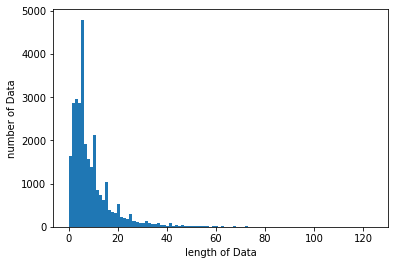

In [118]:
print('train 리뷰의 최대 길이 :',max(len(l) for l in X_token))
print('리뷰의 평균 길이 :',sum(map(len, X_token))/len(X_token))
plt.hist([len(s) for s in X_token], bins=100)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [119]:
max_len = 124
X_data = pad_sequences(X_token, maxlen=max_len)
print("data shape: ", X_data.shape)

data shape:  (29310, 124)


In [120]:
y_data = np.array(y_data).reshape(-1, 1)

In [121]:
print(type(X_data))
print(type(y_data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [122]:
print(X_data[:3])
print(y_data[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0  155  248    1   90    4 2199 1664 1726   62]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
 

# 데이터 분리

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size= 0.3, random_state=1234)

In [124]:
print(X_train[:3])
print(y_train[:3]) 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  58]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0

# activation = ReLU 추가(loss: 0.0943 - acc: 0.9477)

In [125]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [126]:
from tensorflow.keras import regularizers

model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(64, 'relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(128, 'relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split = 0.2)

Train on 16413 samples, validate on 4104 samples
Epoch 1/5
16413/16413 [==============================] - 157s 10ms/sample - loss: 0.3196 - acc: 0.8822 - val_loss: 0.2011 - val_acc: 0.9254
Epoch 2/5
16413/16413 [==============================] - 154s 9ms/sample - loss: 0.1638 - acc: 0.9441 - val_loss: 0.1695 - val_acc: 0.9354
Epoch 3/5
16413/16413 [==============================] - 160s 10ms/sample - loss: 0.1656 - acc: 0.9430 - val_loss: 0.2257 - val_acc: 0.9057
Epoch 4/5
16413/16413 [==============================] - 177s 11ms/sample - loss: 0.1250 - acc: 0.9559 - val_loss: 0.1707 - val_acc: 0.9398
Epoch 5/5
16413/16413 [==============================] - 184s 11ms/sample - loss: 0.1047 - acc: 0.9623 - val_loss: 0.1616 - val_acc: 0.9418


In [127]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_12 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_14 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
Total params: 1,131,937
Trainable params: 1,131,937
Non-trainable params: 0
____________________________________________

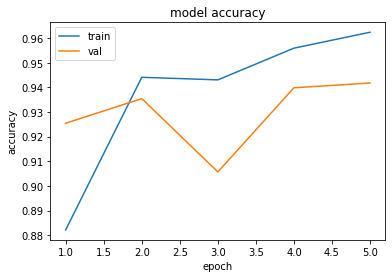

In [128]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

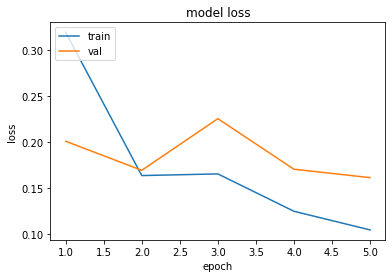

In [129]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [130]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)

8793/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [131]:
model.save('C:\\Users\\user\\Documents\\GitHub\\grad_project\\model\\model8n.h5')